# SVR Model on sampling-2 Dataset with Cross Validation

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("CheXpre.csv")

In [3]:
df.tail()

,TOA,Oil,MIBK,Temperature,Percentage,Aycicek,Badem,Hint,Keten,Misir,Susam,Citric,Glycolic,Malic
349,1.5,1.5,0.0,0.4,0.8633,0,0,0,0,1,0,0,0,1
350,1.5,1.5,0.0,0.4,0.8663,0,0,0,1,0,0,0,0,1
351,1.5,1.5,0.0,0.4,0.9073,0,1,0,0,0,0,0,0,1
352,1.5,1.5,0.0,0.4,0.8709,0,0,0,0,0,1,0,0,1
353,1.5,1.5,0.0,0.4,0.9407,0,0,1,0,0,0,0,0,1


### Information about Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TOA          354 non-null    float64
 1   Oil          354 non-null    float64
 2   MIBK         354 non-null    float64
 3   Temperature  354 non-null    float64
 4   Percentage   354 non-null    float64
 5   Aycicek      354 non-null    int64  
 6   Badem        354 non-null    int64  
 7   Hint         354 non-null    int64  
 8   Keten        354 non-null    int64  
 9   Misir        354 non-null    int64  
 10  Susam        354 non-null    int64  
 11  Citric       354 non-null    int64  
 12  Glycolic     354 non-null    int64  
 13  Malic        354 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 38.8 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TOA,354.0,0.868644,0.531293,0.00,0.5000,0.75000,1.50000,1.75
Oil,354.0,1.271186,1.048783,0.00,0.0000,1.50000,2.25000,3.00
MIBK,354.0,0.081356,0.192912,0.00,0.0000,0.00000,0.00000,0.70
Temperature,354.0,0.257627,0.033000,0.25,0.2500,0.25000,0.25000,0.40
Percentage,354.0,0.572611,0.305248,0.00,0.3513,0.62295,0.80615,1.00
Aycicek,354.0,0.163842,0.370656,0.00,0.0000,0.00000,0.00000,1.00
Badem,354.0,0.163842,0.370656,0.00,0.0000,0.00000,0.00000,1.00
Hint,354.0,0.166667,0.373205,0.00,0.0000,0.00000,0.00000,1.00
Keten,354.0,0.163842,0.370656,0.00,0.0000,0.00000,0.00000,1.00
Misir,354.0,0.166667,0.373205,0.00,0.0000,0.00000,0.00000,1.00


In [6]:
df.isnull().sum()

TOA            0
Oil            0
MIBK           0
Temperature    0
Percentage     0
Aycicek        0
Badem          0
Hint           0
Keten          0
Misir          0
Susam          0
Citric         0
Glycolic       0
Malic          0
dtype: int64

### Visualizing of Dataset

In [7]:
import seaborn as sns

/tmp/ipykernel_7840/2983878699.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[["Percentage"]], shade = True);


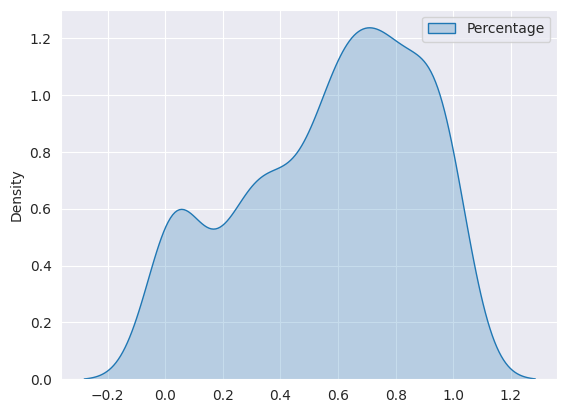

In [9]:
sns.kdeplot(df[["Percentage"]], shade = True);

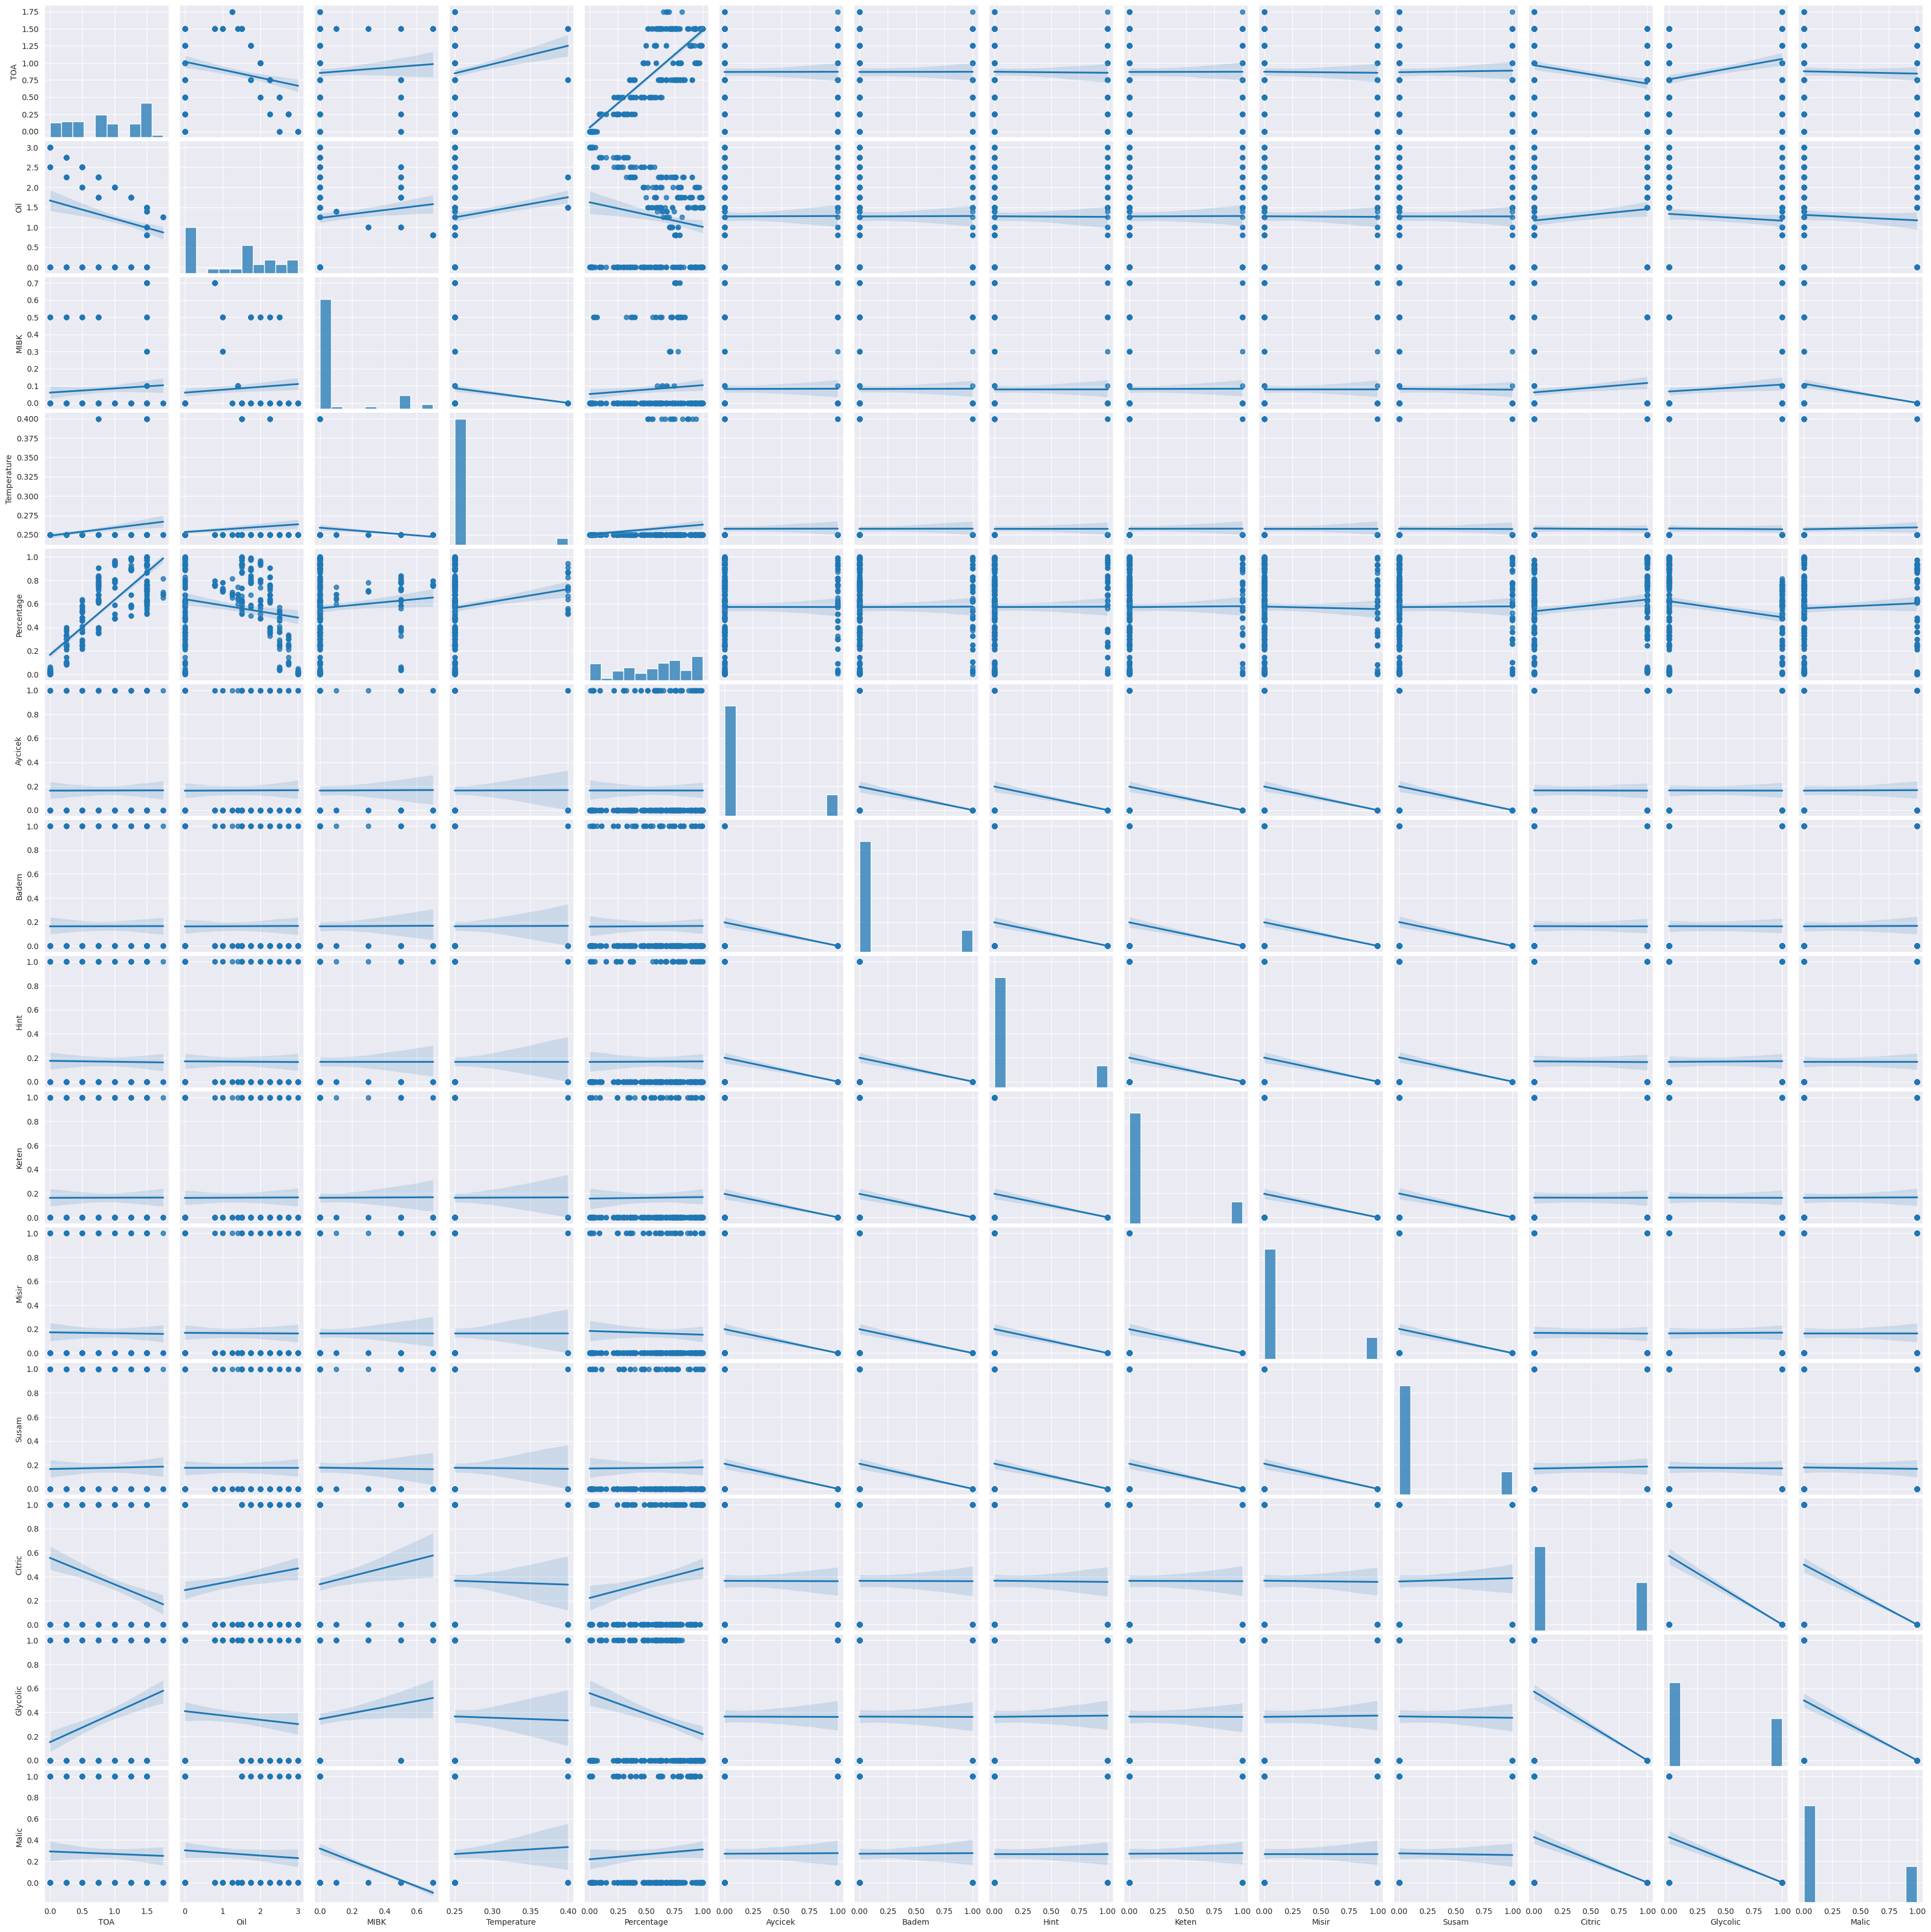

In [10]:
sns.pairplot(df, kind = "reg");

In [11]:
df.corr()

,TOA,Oil,MIBK,Temperature,Percentage,Aycicek,Badem,Hint,Keten,Misir,Susam,Citric,Glycolic,Malic
TOA,1.000000,-0.231398,6.724853e-02,1.663710e-01,0.815710,0.001707,0.001707,-1.071531e-02,0.001707,-1.071531e-02,0.016027,-0.244007,0.270447,-2.862214e-02
Oil,-0.231398,1.000000,9.100843e-02,1.058185e-01,-0.179216,0.003798,0.003798,-5.428161e-03,0.003798,-5.428161e-03,-0.000451,0.131802,-0.078369,-5.784337e-02
MIBK,0.067249,0.091008,1.000000e+00,-9.774852e-02,0.081878,0.003223,0.003223,-2.075015e-17,0.003223,3.801919e-17,-0.009416,0.137269,0.100705,-2.576139e-01
Temperature,0.166371,0.105818,-9.774852e-02,1.000000e+00,0.114874,0.001766,0.001766,3.830633e-17,0.001766,-3.271999e-17,-0.005161,-0.014944,-0.014944,3.235518e-02
Percentage,0.815710,-0.179216,8.187755e-02,1.148736e-01,1.000000,-0.000371,0.004521,3.480561e-03,0.010315,-2.583771e-02,0.007835,0.157685,-0.216328,6.348281e-02
Aycicek,0.001707,0.003798,3.223174e-03,1.766472e-03,-0.000371,1.000000,-0.195946,-1.979626e-01,-0.195946,-1.979626e-01,-0.203973,-0.002150,-0.002150,4.655496e-03
Badem,0.001707,0.003798,3.223174e-03,1.766472e-03,0.004521,-0.195946,1.000000,-1.979626e-01,-0.195946,-1.979626e-01,-0.203973,-0.002150,-0.002150,4.655496e-03
Hint,-0.010715,-0.005428,-2.075015e-17,3.830633e-17,0.003481,-0.197963,-0.197963,1.000000e+00,-0.197963,-2.000000e-01,-0.206072,-0.007875,0.007875,1.514332e-17
Keten,0.001707,0.003798,3.223174e-03,1.766472e-03,0.010315,-0.195946,-0.195946,-1.979626e-01,1.000000,-1.979626e-01,-0.203973,-0.002150,-0.002150,4.655496e-03
Misir,-0.010715,-0.005428,3.801919e-17,-3.271999e-17,-0.025838,-0.197963,-0.197963,-2.000000e-01,-0.197963,1.000000e+00,-0.206072,-0.007875,0.007875,-2.342482e-17


## Oversampling

In [12]:
df1 = df.iloc[:177, :]
df2 = df.iloc[177:, :]

In [13]:
df.shape

(354, 14)

In [14]:
df1.shape

(177, 14)

In [15]:
df2.shape

(177, 14)

In [16]:
from sklearn.utils import resample

In [17]:
n_iterations = 5
n_size = int(len(df1))*(6)

medians = list()
for i in range(n_iterations):
    r1 = resample(df1, n_samples = n_size)
r1.tail()
r1

,TOA,Oil,MIBK,Temperature,Percentage,Aycicek,Badem,Hint,Keten,Misir,Susam,Citric,Glycolic,Malic
166,0.50,2.50,0.0,0.25,0.4600,0,0,0,0,0,1,0,0,1
101,0.50,2.50,0.0,0.25,0.2763,0,0,1,0,0,0,0,1,0
133,1.50,1.40,0.1,0.25,0.6791,0,0,0,0,1,0,0,1,0
11,1.25,1.75,0.0,0.25,0.9806,0,0,1,0,0,0,1,0,0
42,0.75,1.75,0.5,0.25,0.8163,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,1.00,2.00,0.0,0.25,0.7816,0,0,0,0,0,1,0,0,1
77,1.50,1.50,0.0,0.25,0.7317,0,0,1,0,0,0,0,1,0
54,0.25,2.25,0.5,0.25,0.3244,1,0,0,0,0,0,1,0,0
70,1.75,1.25,0.0,0.25,0.6749,0,0,0,0,0,1,0,1,0


In [18]:
new_df1 = pd.concat([df1, r1],axis=0)
new_df1

,TOA,Oil,MIBK,Temperature,Percentage,Aycicek,Badem,Hint,Keten,Misir,Susam,Citric,Glycolic,Malic
0,1.50,1.50,0.0,0.25,0.9900,1,0,0,0,0,0,1,0,0
1,1.50,1.50,0.0,0.25,0.9972,0,0,0,0,1,0,1,0,0
2,1.50,1.50,0.0,0.25,0.9949,0,0,0,1,0,0,1,0,0
3,1.50,1.50,0.0,0.25,0.9932,0,1,0,0,0,0,1,0,0
4,1.50,1.50,0.0,0.25,0.9972,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,1.00,2.00,0.0,0.25,0.7816,0,0,0,0,0,1,0,0,1
77,1.50,1.50,0.0,0.25,0.7317,0,0,1,0,0,0,0,1,0
54,0.25,2.25,0.5,0.25,0.3244,1,0,0,0,0,0,1,0,0
70,1.75,1.25,0.0,0.25,0.6749,0,0,0,0,0,1,0,1,0


In [19]:
n_iterations = 5
n_size = int(len(df2))*(14)

medians = list()
for i in range(n_iterations):
    r2 = resample(df2, n_samples = n_size)
r2.tail()
r2

,TOA,Oil,MIBK,Temperature,Percentage,Aycicek,Badem,Hint,Keten,Misir,Susam,Citric,Glycolic,Malic
200,1.50,0.00,0.0,0.25,0.7317,0,0,1,0,0,0,0,1,0
236,1.00,0.00,0.0,0.25,0.5885,0,0,1,0,0,0,0,1,0
237,0.75,0.00,0.0,0.25,0.7615,1,0,0,0,0,0,1,0,0
307,0.75,1.75,0.5,0.25,0.7949,0,0,0,0,1,0,1,0,0
277,0.25,0.00,0.0,0.25,0.3050,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,1.25,0.00,0.0,0.25,0.9044,0,0,1,0,0,0,0,0,1
198,1.50,0.00,0.0,0.25,0.6318,0,1,0,0,0,0,0,1,0
205,1.25,0.00,0.0,0.25,0.9900,0,0,0,0,0,1,1,0,0
343,1.50,1.50,0.0,0.25,0.9311,0,0,0,0,1,0,0,0,1


In [20]:
new_df2 = pd.concat([df2, r2],axis=0)
new_df2

,TOA,Oil,MIBK,Temperature,Percentage,Aycicek,Badem,Hint,Keten,Misir,Susam,Citric,Glycolic,Malic
177,0.00,3.00,0.0,0.25,0.0208,0,1,0,0,0,0,0,0,1
178,0.00,3.00,0.0,0.25,0.0000,0,0,0,0,0,1,0,0,1
179,0.00,3.00,0.0,0.25,0.0072,0,0,1,0,0,0,0,0,1
180,1.50,1.50,0.0,0.25,0.9787,0,0,0,0,0,1,1,0,0
181,1.50,1.50,0.0,0.25,0.9727,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,1.25,0.00,0.0,0.25,0.9044,0,0,1,0,0,0,0,0,1
198,1.50,0.00,0.0,0.25,0.6318,0,1,0,0,0,0,0,1,0
205,1.25,0.00,0.0,0.25,0.9900,0,0,0,0,0,1,1,0,0
343,1.50,1.50,0.0,0.25,0.9311,0,0,0,0,1,0,0,0,1


In [21]:
bootstrap = pd.concat([new_df1, new_df2])

In [22]:
bootstrap

,TOA,Oil,MIBK,Temperature,Percentage,Aycicek,Badem,Hint,Keten,Misir,Susam,Citric,Glycolic,Malic
0,1.50,1.50,0.0,0.25,0.9900,1,0,0,0,0,0,1,0,0
1,1.50,1.50,0.0,0.25,0.9972,0,0,0,0,1,0,1,0,0
2,1.50,1.50,0.0,0.25,0.9949,0,0,0,1,0,0,1,0,0
3,1.50,1.50,0.0,0.25,0.9932,0,1,0,0,0,0,1,0,0
4,1.50,1.50,0.0,0.25,0.9972,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,1.25,0.00,0.0,0.25,0.9044,0,0,1,0,0,0,0,0,1
198,1.50,0.00,0.0,0.25,0.6318,0,1,0,0,0,0,0,1,0
205,1.25,0.00,0.0,0.25,0.9900,0,0,0,0,0,1,1,0,0
343,1.50,1.50,0.0,0.25,0.9311,0,0,0,0,1,0,0,0,1


In [23]:
bootstrap.shape

(3894, 14)

## Model Building

In [24]:
X = bootstrap.drop("Percentage", axis = 1)
y = bootstrap["Percentage"]

In [25]:
from sklearn.model_selection import train_test_split, cross_val_score

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)

In [27]:
from sklearn import svm
svr_regr = svm.SVR()
svr_model = svr_regr.fit(X_train, y_train)

### Model Evaluation

In [28]:
y_pred = svr_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.06453849426895919

In [29]:
svr_model.score(X_train, y_train)

0.9531635975212879

### Cross Validation

In [30]:
from numpy import mean
from numpy import absolute
from numpy import sqrt

In [31]:
score = cross_val_score(svr_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error").mean()

In [32]:
sqrt(mean(absolute(score)))

0.06596159100278914

### Export the Model

In [33]:
import pickle
pickle.dump(svr_model, open("SVR_sampling2_CV.pkl","wb"))